#16년, 17년 각각 자료

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

In [7]:
df = pd.read_csv("../data/2016-2017gsouth.csv", thousands=',', encoding='euc-kr')
df1 = pd.read_csv("../data/2016-2017gsouthseek.csv", thousands=',', encoding='euc-kr')
df2 = pd.read_csv("../data/2016-2017ojeon.csv", thousands=',', encoding='euc-kr')
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0


In [8]:
df = pd.merge(df, df1, on="일시")
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),시도지역코드,발생건수(건)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9,경남,744
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5,경남,3985
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6,경남,2263
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8,경남,193
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0,경남,4042


In [9]:
del df['시도지역코드']

In [10]:
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),발생건수(건)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9,744
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5,3985
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6,2263
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8,193
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0,4042


In [11]:
df = pd.merge(df, df2, on="일시")
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),평균 현지기압(hPa),발생건수(건),평균 오존전량(DU)
0,경상남도,2016-01-01,-3.1,-8.1,0.9,19.0,1018.9,744,354.9
1,경상남도,2016-01-02,-3.3,-9.5,3.9,30.0,1020.5,3985,365.5
2,경상남도,2016-01-03,-3.0,-11.0,6.8,15.0,1019.6,2263,373.2
3,경상남도,2016-01-04,0.4,-6.6,12.2,35.0,1014.8,193,339.8
4,경상남도,2016-01-05,2.7,-5.3,11.0,38.0,1014.0,4042,269.9


In [12]:
df['최고기온(°C)'] = df['최고기온(°C)'] - df['최저기온(°C)'] 
df['지점']='경북'
df.rename(columns={ df.columns[0] : '지점',
                    df.columns[1] : '일시',
                    df.columns[2] : '평균기온',
                    df.columns[3] : '최저기온',
                    df.columns[4] : '일교차',
                    df.columns[5] : '최소상대습도',
                    df.columns[6] : '기압',
                    df.columns[7] : '환자수',
                    df.columns[8] : '오존량'},inplace=True)
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량
0,경북,2016-01-01,-3.1,-8.1,9.0,19.0,1018.9,744,354.9
1,경북,2016-01-02,-3.3,-9.5,13.4,30.0,1020.5,3985,365.5
2,경북,2016-01-03,-3.0,-11.0,17.8,15.0,1019.6,2263,373.2
3,경북,2016-01-04,0.4,-6.6,18.8,35.0,1014.8,193,339.8
4,경북,2016-01-05,2.7,-5.3,16.3,38.0,1014.0,4042,269.9


In [13]:
df['최저기온위험지수'] = 'NaN'
df['일교차위험지수'] = 'NaN'
df['습도위험지수'] = 'NaN'
df['오존위험지수'] = 'NaN'
df['기압위험지수'] = 'NaN'
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경북,2016-01-01,-3.1,-8.1,9.0,19.0,1018.9,744,354.9,NaN,NaN,NaN,NaN,NaN
1,경북,2016-01-02,-3.3,-9.5,13.4,30.0,1020.5,3985,365.5,NaN,NaN,NaN,NaN,NaN
2,경북,2016-01-03,-3.0,-11.0,17.8,15.0,1019.6,2263,373.2,NaN,NaN,NaN,NaN,NaN
3,경북,2016-01-04,0.4,-6.6,18.8,35.0,1014.8,193,339.8,NaN,NaN,NaN,NaN,NaN
4,경북,2016-01-05,2.7,-5.3,16.3,38.0,1014.0,4042,269.9,NaN,NaN,NaN,NaN,NaN


In [14]:
#습도는 절대값으로 한다.
for i in df.index:
    if df.values[i,5] >62.5:
        df['습도위험지수'].values[i] = '1'
    elif 62.5<= df.values[i,5] <44.5:
        df['습도위험지수'].values[i] = '2'
    elif 44.5<= df.values[i,5] <30.3:
        df['습도위험지수'].values[i] = '3'
    else:
        df['습도위험지수'].values[i] = '4'
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경북,2016-01-01,-3.1,-8.1,9.0,19.0,1018.9,744,354.9,NaN,NaN,4,NaN,NaN
1,경북,2016-01-02,-3.3,-9.5,13.4,30.0,1020.5,3985,365.5,NaN,NaN,4,NaN,NaN
2,경북,2016-01-03,-3.0,-11.0,17.8,15.0,1019.6,2263,373.2,NaN,NaN,4,NaN,NaN
3,경북,2016-01-04,0.4,-6.6,18.8,35.0,1014.8,193,339.8,NaN,NaN,4,NaN,NaN
4,경북,2016-01-05,2.7,-5.3,16.3,38.0,1014.0,4042,269.9,NaN,NaN,4,NaN,NaN


In [15]:
for i in df.index:        
    if df.values[i,4] < 8.6 : 
        df['일교차위험지수'].values[i] = '1' 
    elif 8.6<= df.values[i,4] < 12.3: 
        df['일교차위험지수'].values[i] = '2'  
    elif 12.3<=df.values[i,4] < 15.8:  
        df['일교차위험지수'].values[i] = '3'  
    elif 15.8<= df.values[i,4] : 
        df['일교차위험지수'].values[i] = '4' 
            
    if df.values[i,3] <-7.7 or 30<=df.values[1,3]: 
        df['최저기온위험지수'].values[i] = '4' 
    elif -7.7<=df.values[i,3] <-0.5:
        df['최저기온위험지수'].values[i] = '3' 
    elif -0.5<=df.values[i,3] < 12.6:
        df['최저기온위험지수'].values[i] = '2'  
    elif 12.6<=df.values[i,3] <30:
        df['최저기온위험지수'].values[i] = '1'  

In [16]:
for i in df.index:        
    if df.values[i,6] < 1007.6 : 
        df['기압위험지수'].values[i] = '1' 
    elif 1007.6<= df.values[i,6] < 1016.2: 
        df['기압위험지수'].values[i] = '2'  
    elif 1016.2<=df.values[i,6] < 1022.1:  
        df['기압위험지수'].values[i] = '3'  
    elif 1022.1<= df.values[i,6] : 
        df['기압위험지수'].values[i] = '4' 

In [17]:
for i in df.index:
    if df.values[i,8] < 319.8:
        df['오존위험지수'].values[i] = '1'
    elif 319.8<=df.values[i,8] < 352.7:
        df['오존위험지수'].values[i] = '2'
    elif 352.7<=df.values[i,8] < 401.4:
        df['오존위험지수'].values[i] = '3'
    elif 401.4<= df.values[i,8]:
        df['오존위험지수'].values[i] = '4'  


In [18]:
df['최소상대습도'] = 100 - df['최소상대습도']
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수
0,경북,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3
1,경북,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3
2,경북,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3
3,경북,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2
4,경북,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2


# 일교차, 습도, 오존량, 기압, 최저

In [19]:
temr = df['일교차'].corr(df['환자수'])
hum = df['최소상대습도'].corr(df['환자수'])
oj = df['오존량'].corr(df['환자수'])
atm = df['기압'].corr(df['환자수'])
mtem = -df['최저기온'].corr(df['환자수'])
al = temr+hum+oj+mtem+atm

temr,hum,oj,mtem,atm

(0.08306324817923076,
 0.11737740817457412,
 0.13388110295274022,
 0.27933315600963415,
 0.23642140376414064)

In [20]:
temr = temr/al
hum = hum/al
oj = oj/al
atm = atm/al
mtem = mtem/al

temr, hum, oj, atm, mtem

(0.0977126951014177,
 0.13807867074989494,
 0.1574930390927528,
 0.2781178565471864,
 0.3285977385087482)

In [21]:
df['ALI'] = float('NaN')
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI
0,경북,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,NaN
1,경북,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,NaN
2,경북,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,NaN
3,경북,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,NaN
4,경북,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,NaN


In [22]:
#temr, hum, oj, atm, mtem
#습도 최저 일교차 오존
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+temr*float(df.values[i,10])+hum*float(df.values[i,11])+oj*float(df.values[i,12])+ atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI
0,경북,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,3.368964
1,경북,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,3.466676
2,경북,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,3.564389
3,경북,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,2.800180
4,경북,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,2.642687


In [23]:
df.to_csv("../data/경남2.csv", encoding='utf-8', sep=',') 

In [25]:
la = pd.read_csv("../data/2016-2017gsouthlast.csv", thousands=',', encoding='euc-kr') 
la.head() 

,지점,일시
0,경남,2016-01-01
1,경남,2016-01-02
2,경남,2016-01-03
3,경남,2016-01-04
4,경남,2016-01-05


In [26]:
la['ALI지수값'] = float('NaN')

In [27]:
for i in df.index: 
    if float(df.values[i,14]) >= 3.0525: 
        la['ALI지수값'].values[i] = '4' 
    elif 2.6452<=float(df.values[i,14]) < 3.0525: 
        la['ALI지수값'].values[i] = '3' 
    elif 1.5354<=float(df.values[i,14]) <2.6452: 
        la['ALI지수값'].values[i] = '2' 
    elif 1<= float(df.values[i,14])<1.5354: 
        la['ALI지수값'].values[i] = '1' 
    
la.head()

,지점,일시,ALI지수값
0,경남,2016-01-01,4.0
1,경남,2016-01-02,4.0
2,경남,2016-01-03,4.0
3,경남,2016-01-04,3.0
4,경남,2016-01-05,2.0


In [28]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.19581744882246452

In [29]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.19581744882246452

In [30]:
la.to_csv("../data/경북1.csv", encoding='utf-8', sep=',') 

In [31]:
df['환자'] = df['환자수']/1000

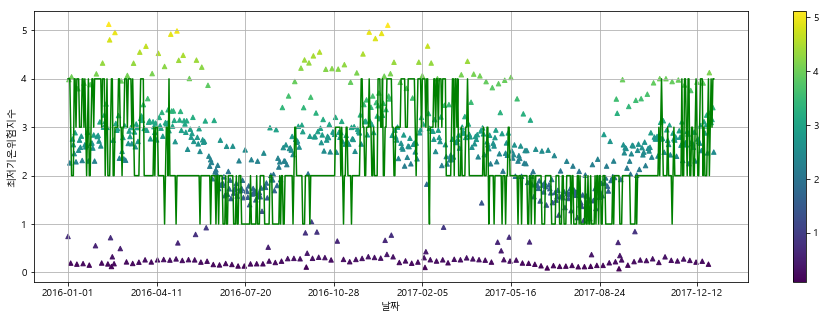

In [32]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

# 습도, 최저기온, 일교차, 기압

In [33]:
la2 = pd.read_csv("../data/2016-2017gnorthlast.csv", thousands=',', encoding='euc-kr') 
la2['ALI지수값'] = 'NaN'

In [34]:
temr = df['일교차'].corr(df['환자수'])
hum = df['최소상대습도'].corr(df['환자수']) 
atm = df['기압'].corr(df['환자수'])
mtem = -df['최저기온'].corr(df['환자수'])
al = temr+hum+mtem+atm
temr,hum,mtem,atm

(0.08306324817923076,
 0.11737740817457412,
 0.27933315600963415,
 0.23642140376414064)

In [35]:
temr = temr/al
hum = hum/al 
atm = atm/al
mtem = mtem/al

temr, hum, atm, mtem

(0.11597850182293631,
 0.16389024323455556,
 0.3301074880707185,
 0.3900237668717897)

In [36]:
#temr, hum, oj, atm, mtem
#습도 최저 일교차 오존
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+temr*float(df.values[i,10])+hum*float(df.values[i,11])+atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자
0,경북,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,3.437936,0.744
1,경북,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,3.553914,3.985
2,경북,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,3.669893,2.263
3,경북,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,2.949761,0.193
4,경북,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,2.949761,4.042


In [37]:
df.to_csv("../data/경북5.csv", encoding='utf-8', sep=',') 

In [38]:
for i in df.index:        
    if float(df.values[i,14]) >= 3.0525:
        la['ALI지수값'].values[i] = '4'
    elif 2.6452<=float(df.values[i,14]) < 3.0525:
        la['ALI지수값'].values[i] = '3'
    elif 1.5354<=float(df.values[i,14]) <2.6452:
        la['ALI지수값'].values[i] = '2'
    elif 1<= float(df.values[i,14])<1.5354:
        la['ALI지수값'].values[i] = '1' 
        
la.head()

,지점,일시,ALI지수값
0,경남,2016-01-01,4.0
1,경남,2016-01-02,4.0
2,경남,2016-01-03,4.0
3,경남,2016-01-04,3.0
4,경남,2016-01-05,3.0


In [39]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.1677695012084004

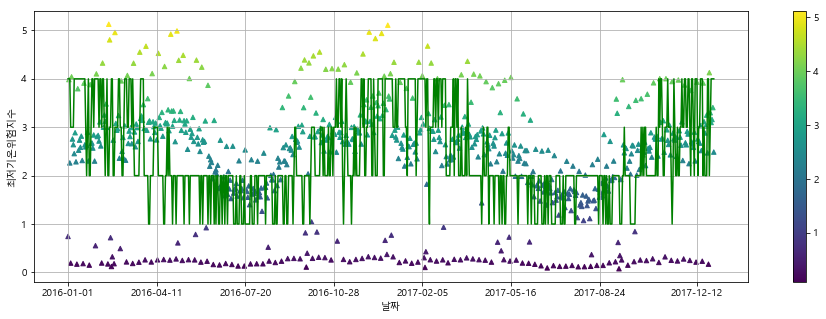

In [40]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

# 일교차, 오존, 기압, 최저기온

In [41]:
temr = df['일교차'].corr(df['환자수']) 
oj = df['오존량'].corr(df['환자수']) 
atm = df['기압'].corr(df['환자수']) 
mtem = -df['최저기온'].corr(df['환자수']) 
al = temr+oj+mtem+atm
temr,oj,mtem,atm

(0.08306324817923076,
 0.13388110295274022,
 0.27933315600963415,
 0.23642140376414064)

In [42]:
temr = temr/al 
oj = oj/al 
atm = atm/al 
mtem = mtem/al 
temr,oj,mtem,atm 

(0.11336614118417326,
 0.1827232181732595,
 0.3812386668683987,
 0.3226719737741685)

In [43]:
#temr, hum, oj, atm, mtem
#습도 최저 일교차 오존
#최저, 일교, 습도, 오존, 기압
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+temr*float(df.values[i,10])+oj*float(df.values[i,12])+atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자
0,경북,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,3.267873,0.744
1,경북,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,3.381239,3.985
2,경북,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,3.494605,2.263
3,경북,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,2.607971,0.193
4,경북,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,2.425248,4.042


In [44]:
for i in df.index:        
    if float(df.values[i,14]) >= 3.0525:
        la['ALI지수값'].values[i] = '4'
    elif 2.6452<=float(df.values[i,14]) < 3.0525:
        la['ALI지수값'].values[i] = '3'
    elif 1.5354<=float(df.values[i,14]) <2.6452:
        la['ALI지수값'].values[i] = '2'
    elif 1<= float(df.values[i,14])<1.5354:
        la['ALI지수값'].values[i] = '1' 
        
la.head()

,지점,일시,ALI지수값
0,경남,2016-01-01,4.0
1,경남,2016-01-02,4.0
2,경남,2016-01-03,4.0
3,경남,2016-01-04,2.0
4,경남,2016-01-05,2.0


In [45]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.22149183546609455

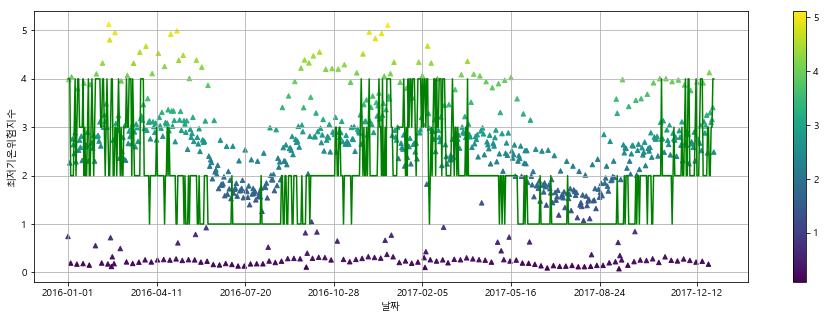

In [46]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

# -----------------------

# 습도, 오존량, 기압, 최저기온

In [47]:
hum = df['최소상대습도'].corr(df['환자수'])
oj = df['오존량'].corr(df['환자수'])
atm = df['기압'].corr(df['환자수'])
mtem = -df['최저기온'].corr(df['환자수'])
al = hum+oj+mtem+atm 
hum, oj, atm, mtem

(0.11737740817457412,
 0.13388110295274022,
 0.23642140376414064,
 0.27933315600963415)

In [48]:
hum = hum/al
oj = oj/al
atm = atm/al
mtem = mtem/al
hum,oj,atm,mtem

(0.15303182256943654,
 0.17454865898889613,
 0.30823647305826496,
 0.36418304538340235)

In [49]:
#최저, 일교, 습도, 오존, 기압
for i in df.index:
    df['ALI'].values[i] = mtem*float(df.values[i,9])+hum*float(df.values[i,11])+oj*float(df.values[i,12])+atm*float(df.values[i,13])

df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자
0,경북,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,3.517215,0.744
1,경북,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,3.517215,3.985
2,경북,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,3.517215,2.263
3,경북,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,2.670247,0.193
4,경북,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,2.495698,4.042


In [50]:
for i in df.index:        
    if float(df.values[i,14]) >= 3.0525:
        la['ALI지수값'].values[i] = '4'
    elif 2.6452<=float(df.values[i,14]) < 3.0525:
        la['ALI지수값'].values[i] = '3'
    elif 1.5354<=float(df.values[i,14]) <2.6452:
        la['ALI지수값'].values[i] = '2'
    elif 1<= float(df.values[i,14])<1.5354:
        la['ALI지수값'].values[i] = '1' 
        
la.head()

,지점,일시,ALI지수값
0,경남,2016-01-01,4.0
1,경남,2016-01-02,4.0
2,경남,2016-01-03,4.0
3,경남,2016-01-04,3.0
4,경남,2016-01-05,2.0


In [51]:
end = la['ALI지수값'].corr(df['환자수'])
end

0.19567440545582668

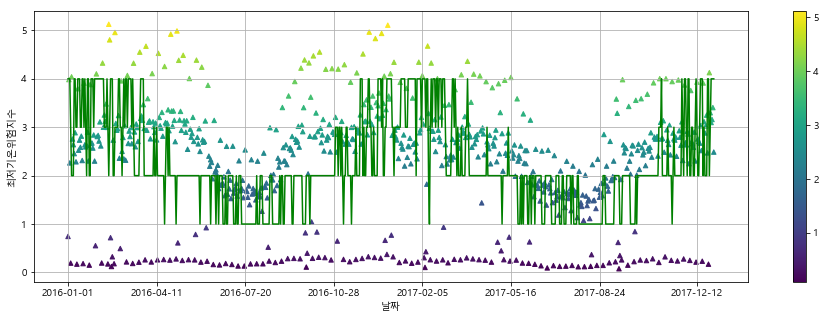

In [52]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALI지수값'], color = 'green') 
plt.scatter(df['일시'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show()

In [53]:
df['all오존'] = df['오존량'].sum()

In [54]:
df.head()

,지점,일시,평균기온,최저기온,일교차,최소상대습도,기압,환자수,오존량,최저기온위험지수,일교차위험지수,습도위험지수,오존위험지수,기압위험지수,ALI,환자,all오존
0,경북,2016-01-01,-3.1,-8.1,9.0,81.0,1018.9,744,354.9,4,2,4,3,3,3.517215,0.744,238176.7
1,경북,2016-01-02,-3.3,-9.5,13.4,70.0,1020.5,3985,365.5,4,3,4,3,3,3.517215,3.985,238176.7
2,경북,2016-01-03,-3.0,-11.0,17.8,85.0,1019.6,2263,373.2,4,4,4,3,3,3.517215,2.263,238176.7
3,경북,2016-01-04,0.4,-6.6,18.8,65.0,1014.8,193,339.8,3,4,4,2,2,2.670247,0.193,238176.7
4,경북,2016-01-05,2.7,-5.3,16.3,62.0,1014.0,4042,269.9,3,4,4,1,2,2.495698,4.042,238176.7
